# Visualization Functions
This tutorial will the use of the visualization functions available with HySOM. These functions are tailored for the analysis of C-Q hysteresis loops 

In [89]:
import numpy as np

def generate_sequences(num_sequences=200, sequence_length=100):
    """
    Generate synthetic time series data with continuous variations in two properties.

    Parameters
    ----------
    num_sequences : int, optional
        Number of sequences to generate (default is 200).
    sequence_length : int, optional
        Number of data pairs per sequence (default is 100).

    Returns
    -------
    np.ndarray
        Array of shape (num_sequences, sequence_length, 2), where each sequence
        contains (x, y) pairs that vary smoothly based on two parameters.
    """
    sequences = np.zeros((num_sequences, sequence_length, 2))
    
    # Parameters that vary smoothly
    param1 = np.linspace(0.1, 5.0, 3)  # Example: frequency variation
    param2 = np.linspace(0.1, 1.0, 3)  # Example: amplitude variation

    for i in range(num_sequences):
        t = np.linspace(0, 10, sequence_length)  # Time axis
        p1x = np.random.choice(param1)
        p2x = np.random.choice(param2)
        p1y = np.random.choice(param1)
        p2y = np.random.choice(param2)
        x = np.sin(p1x * t) * p2x  # Example variation
        y = np.cos(p1y * t) * p2y  # Another variation
        sequences[i] = np.column_stack((x, y))

    return sequences

data = generate_sequences(num_sequences=500)


In [31]:
from hysom import HSOM
import numpy as np
import matplotlib.pyplot as plt

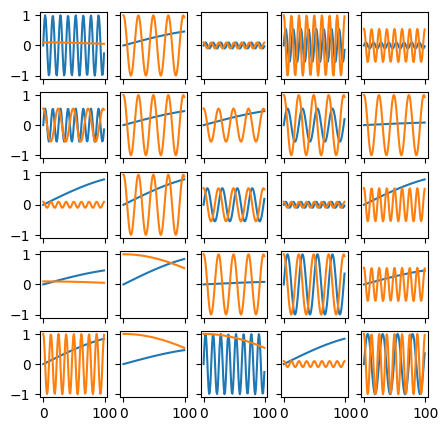

In [90]:
idxs = np.random.randint(0, len(data), 25)
fig, axs = plt.subplots(5,5, figsize = (5,5), sharex = True, sharey = True)

for idx, ax in zip(idxs, axs.flatten()):
    sample = data[idx]
    ax.plot(sample[:,0])
    ax.plot(sample[:,1])
    


In [91]:
width = 5
height = 5
mysom = HSOM(width,height,(100,2))

mysom.train(data, epochs=10, distance_function= "euclidean", track_errors=True, initial_sigma=8, final_learning_rate=0.001)


Training Completed! - Quant. Error: 7.61 - Topo. Error: 0.01


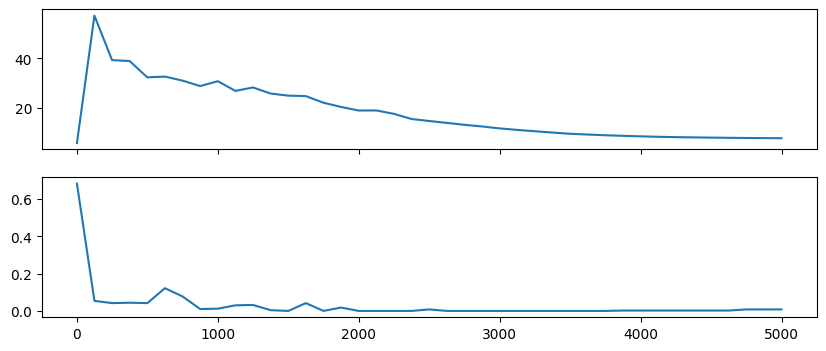

In [92]:
idx, qe = mysom.get_QE_history()
idx, te = mysom.get_TE_history()

fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,4), sharex=True)

ax1.plot(idx, qe)
ax2.plot(idx, te)

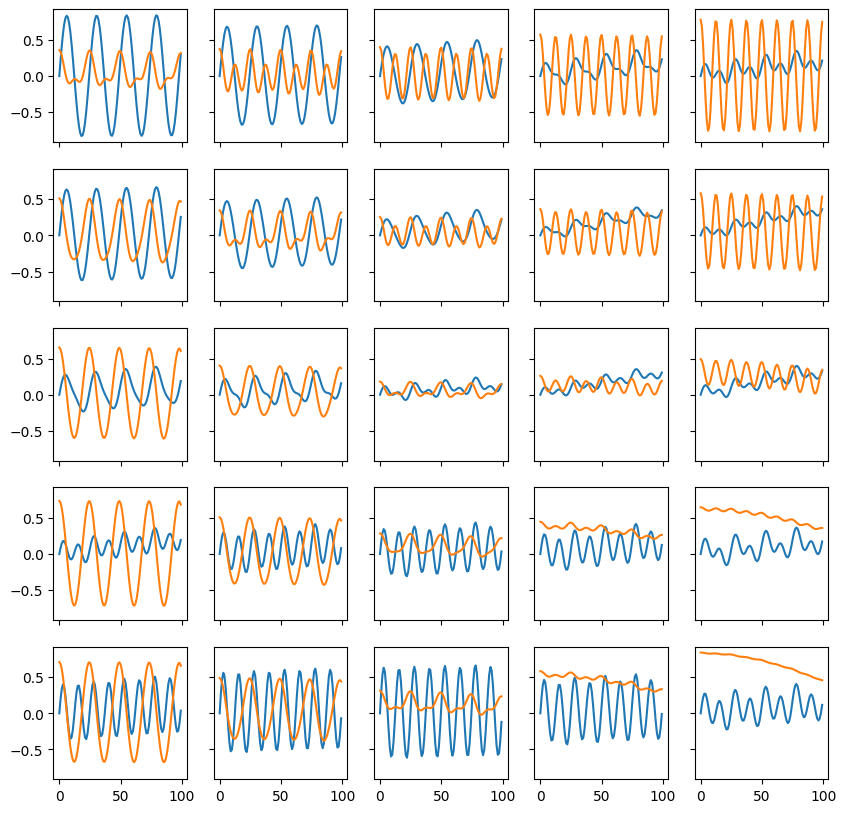

In [93]:
fig, axs = plt.subplots(height,width, figsize = (10,10), sharex = True, sharey=True)
prototypes = mysom.get_prototypes()
for row in range(height):
    for col in range(width):
        prototype = prototypes[row, col]
        ax = axs[row, col]
        ax.plot(prototype[:,0])
        ax.plot(prototype[:,1])
        
